In [3]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np
import itertools
import pickle
import os

In [4]:
def plot_ablation_results(ablation_dict, results, tasks, icl_sample_counts, normalization, result_type, task_choice=None):
    line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 5)), (0, (1, 10))]
    marker_styles = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h']
    
    task_styles = {}
    for idx, task in enumerate(tasks):
        style = {
            'linestyle': line_styles[idx % len(line_styles)],
            'marker': marker_styles[idx % len(marker_styles)]
        }
        task_styles[task] = style
    
    for ablation_type, groups in ablation_dict.items():
        print(f"\nPlotting {ablation_type}...")
        for group_name, exps in groups.items():
            plt.figure(figsize=(12, 6))
            
            color_cycle = itertools.cycle(['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'brown'])
            exp_colors = {exp: next(color_cycle) for exp in exps}
            
            for exp in exps:
                color = exp_colors[exp]
                for idx, task in enumerate(tasks):
                    if task_choice and task_choice != task:
                        continue
                    test_loss = results[exp][f"results_{result_type}"][0, :, idx] / normalization
                    plt.plot(
                        icl_sample_counts,
                        test_loss,
                        label=f"{exp} - {task}",
                        color=color,
                        linestyle=task_styles[task]['linestyle'],
                        marker=task_styles[task]['marker']
                    )
            
            plt.xlabel('Number of ICL Samples')
            plt.ylabel('Test Loss')
            if not task_choice:
                plt.title(f"{ablation_type} - Group: {group_name} - Type: {result_type}")
            else:
                plt.title(f"{ablation_type} - Group: {group_name} - Type: {result_type} - Task: {task_choice}")
            plt.grid(True)
            
            exp_handles = [Line2D([0], [0], color=exp_colors[exp], label=exp) for exp in exps]
            task_handles = [Line2D([0], [0], linestyle=task_styles[task]['linestyle'], marker=task_styles[task]['marker'], label=task) for task in tasks]
            
            if not task_choice:
                first_legend = plt.legend(handles=exp_handles, title="Experiments", loc='upper left')
                second_legend = plt.legend(handles=task_handles, title="Tasks", loc='upper right')
                plt.gca().add_artist(first_legend)
            else:
                plt.legend(handles=exp_handles, title="Experiments", loc='upper right')
            
            plt.tight_layout()
            plt.show()

# Theoritical Curve

In [44]:
experiments = [
    # {
    #     'name': 'zero_cov_11',
    #     'description': 'Mean (1.4)(0.3) + (-0.6)(0.7) = 0 and Cov 1-1',
    #     'means': [1.4, -0.6],
    #     'cov_matrices': [1.0, 1.0],
    #     'noise_levels': [0, 0],
    #     'mixture_weights': [0.3, 0.7],
    # },
    # {
    #     'name': 'zero_cov_11_different_means',
    #     'description': 'Mean (2.1)(0.3) + (-0.9)(0.7) = 0 and Cov 1-1 -- Diff Means',
    #     'means': [2.1, -0.9],
    #     'cov_matrices': [1.0, 1.0],
    #     'noise_levels': [0, 0],
    #     'mixture_weights': [0.3, 0.7],
    # },
    # {
    #     'name': 'zero_cov_22',
    #     'description': 'Mean (1.4)(0.3) + (-0.6)(0.7) = 0 and Cov 2-2',
    #     'means': [1.4, -0.6],
    #     'cov_matrices': [2.0, 2.0],
    #     'noise_levels': [0, 0],
    #     'mixture_weights': [0.3, 0.7],
    # },
    {
        'name': 'zero_cov_12',
        'description': 'Mean (1.4)(0.3) + (-0.6)(0.7) = 0 and Cov 1-2',
        'means': [1.4, -0.6],
        'cov_matrices': [1.0, 2.0],
        'noise_levels': [0, 0],
        'mixture_weights': [0.3, 0.7],
    },
#     {
#         'name': 'nonzero_cov_11',
#         'description': 'Mean (1)(0.3) + (-1)(0.7) = -0.4 and Cov 1-1',
#         'means': [1.0, -1.0],
#         'cov_matrices': [1.0, 1.0],
#         'noise_levels': [0, 0],
#         'mixture_weights': [0.3, 0.7],
#     },
#     {
#         'name': 'nonzero_cov_11_different_means',
#         'description': 'Mean (1.7)(0.3) + (-1.3)(0.7) = -0.4 and Cov 1-1 -- Diff Means',
#         'means': [1.7, -1.3],
#         'cov_matrices': [1.0, 1.0],
#         'noise_levels': [0, 0],
#         'mixture_weights': [0.3, 0.7],
#     },
#     {
#         'name': 'nonzero_cov_22',
#         'description': 'Mean (1)(0.3) + (-1)(0.7) = -0.4 and Cov 2-2',
#         'means': [1.0, -1.0],
#         'cov_matrices': [2.0, 2.0],
#         'noise_levels': [0, 0],
#         'mixture_weights': [0.3, 0.7],
#     },
#     {
#         'name': 'nonzero_cov_12',
#         'description': 'Mean (1)(0.3) + (-1)(0.7) = -0.4 and Cov 1-2',
#         'means': [1.0, -1.0],
#         'cov_matrices': [1.0, 2.0],
#         'noise_levels': [0, 0],
#         'mixture_weights': [0.3, 0.7],
#     },

#      {'name': 'multi_task_mu_ratio_0.1_layers_1',
#   'description': 'Multi-task experiment with mu_ratio 0.1, 1 layers, dimension 10.',
#   'means': [-1, 1],
#   'cov_matrices': [22.799999999999997, 22.799999999999997],
#   'noise_levels': [0, 0],
#   'mixture_weights': [0.5, 0.5],
#   'layer_num': 1,
#   'mu_ratio': 0.1,
#   'dimension': 10},
#  {'name': 'multi_task_mu_ratio_0.1_layers_2',
#   'description': 'Multi-task experiment with mu_ratio 0.1, 2 layers, dimension 10.',
#   'means': [-1, 1],
#   'cov_matrices': [22.799999999999997, 22.799999999999997],
#   'noise_levels': [0, 0],
#   'mixture_weights': [0.5, 0.5],
#   'layer_num': 2,
#   'mu_ratio': 0.1,
#   'dimension': 10},
#  {'name': 'multi_task_mu_ratio_0.1_layers_3',
#   'description': 'Multi-task experiment with mu_ratio 0.1, 3 layers, dimension 10.',
#   'means': [-1, 1],
#   'cov_matrices': [22.799999999999997, 22.799999999999997],
#   'noise_levels': [0, 0],
#   'mixture_weights': [0.5, 0.5],
#   'layer_num': 3,
#   'mu_ratio': 0.1,
#   'dimension': 10},
#  {'name': 'multi_task_mu_ratio_0.5_layers_1',
#   'description': 'Multi-task experiment with mu_ratio 0.5, 1 layers, dimension 10.',
#   'means': [-1, 1],
#   'cov_matrices': [2.3200000000000003, 2.3200000000000003],
#   'noise_levels': [0, 0],
#   'mixture_weights': [0.5, 0.5],
#   'layer_num': 1,
#   'mu_ratio': 0.5,
#   'dimension': 10},
#  {'name': 'multi_task_mu_ratio_0.5_layers_2',
#   'description': 'Multi-task experiment with mu_ratio 0.5, 2 layers, dimension 10.',
#   'means': [-1, 1],
#   'cov_matrices': [2.3200000000000003, 2.3200000000000003],
#   'noise_levels': [0, 0],
#   'mixture_weights': [0.5, 0.5],
#   'layer_num': 2,
#   'mu_ratio': 0.5,
#   'dimension': 10},
#  {'name': 'multi_task_mu_ratio_0.5_layers_3',
#   'description': 'Multi-task experiment with mu_ratio 0.5, 3 layers, dimension 10.',
#   'means': [-1, 1],
#   'cov_matrices': [2.3200000000000003, 2.3200000000000003],
#   'noise_levels': [0, 0],
#   'mixture_weights': [0.5, 0.5],
#   'layer_num': 3,
#   'mu_ratio': 0.5,
#   'dimension': 10},
#  {'name': 'multi_task_mu_ratio_0.9_layers_1',
#   'description': 'Multi-task experiment with mu_ratio 0.9, 1 layers, dimension 10.',
#   'means': [-1, 1],
#   'cov_matrices': [0.04444444444444473, 0.04444444444444473],
#   'noise_levels': [0, 0],
#   'mixture_weights': [0.5, 0.5],
#   'layer_num': 1,
#   'mu_ratio': 0.9,
#   'dimension': 10},
#  {'name': 'multi_task_mu_ratio_0.9_layers_2',
#   'description': 'Multi-task experiment with mu_ratio 0.9, 2 layers, dimension 10.',
#   'means': [-1, 1],
#   'cov_matrices': [0.04444444444444473, 0.04444444444444473],
#   'noise_levels': [0, 0],
#   'mixture_weights': [0.5, 0.5],
#   'layer_num': 2,
#   'mu_ratio': 0.9,
#   'dimension': 10},
#  {'name': 'multi_task_mu_ratio_0.9_layers_3',
#   'description': 'Multi-task experiment with mu_ratio 0.9, 3 layers, dimension 10.',
#   'means': [-1, 1],
#   'cov_matrices': [0.04444444444444473, 0.04444444444444473],
#   'noise_levels': [0, 0],
#   'mixture_weights': [0.5, 0.5],
#   'layer_num': 3,
#   'mu_ratio': 0.9,
#   'dimension': 10}
]

In [45]:
d = 10
# icl_sample_counts = [1, 3, 5, 7, 10, 15, 20]
icl_sample_counts = [1, 10, 20, 30, 40, 50]

In [48]:
theory = {}

for exp_idx, exp in enumerate(experiments):
    exp_name = exp['name']
    exp_description = exp['description']
    print(f"\nStarting theory calculation for experiment '{exp_name}': {exp_description}")
    mixture_weights = exp['mixture_weights']

    mean_x = np.zeros(shape=(d))
    cov_x = np.diag(np.ones(shape=(d)))

    mean_b = []
    cov_b = []

    for i in range(len(mixture_weights)):
        mean_b.append(np.full((d), fill_value=exp['means'][i]))
        cov_b.append(np.eye(d) * exp['cov_matrices'][i])
    
    pretrain_losses = []
    finetune_losses = []
    joint_losses = []
    heads_losses = []

    M = sum([mixture_weights[t] * (cov_b[t] + np.outer(mean_b[t], mean_b[t])) for t in range(len(mixture_weights))])
    M_mean = sum([mixture_weights[t] * np.outer(mean_b[t], mean_b[t]) for t in range(len(mixture_weights))])
    M_cov = M - M_mean

    normalization = np.trace(M @ cov_x)

    for n in icl_sample_counts:
        C = n * np.trace(M @ cov_x) * cov_x + n*(n+1) * cov_x @ M @ cov_x
        C_bar = n ** 2 * cov_x @ M_mean @ cov_x
        W_pretrain = n * M @ cov_x @ np.linalg.inv(C)

        term_1_pretrain = np.trace(M @ cov_x)
        term_2_pretrain = -2 * n * np.trace(W_pretrain @ cov_x @ M @ cov_x)
        print(W_pretrain.shape, C.shape, cov_x.shape)
        term_3_pretrain = np.trace(W_pretrain @ C @ W_pretrain.T @ cov_x)
        L_pretrain = term_1_pretrain + term_2_pretrain + term_3_pretrain
        pretrain_losses.append(L_pretrain)

        term_1_fine_tune = np.trace(M_cov @ cov_x)
        term_2_fine_tune = -2 * n * np.trace(W_pretrain @ cov_x @ M_cov @ cov_x)
        term_3_fine_tune = np.trace(W_pretrain @ (C - C_bar) @ W_pretrain.T @ cov_x)
        L_fine_tune = term_1_fine_tune + term_2_fine_tune + term_3_fine_tune
        finetune_losses.append(L_fine_tune)

        W_joint = n * M_cov @ cov_x @ np.linalg.inv(C-C_bar)

        term_1_joint = np.trace(M_cov @ cov_x)
        term_2_joint = -2 * n * np.trace(W_joint @ cov_x @ M_cov @ cov_x)
        term_3_joint = np.trace(W_joint @ (C - C_bar) @ W_joint.T @ cov_x)
        L_joint = term_1_joint + term_2_joint + term_3_joint
        joint_losses.append(L_joint)
        W_decoupled = M_cov @ np.linalg.inv(
            np.trace(cov_x @ M_cov) * np.eye(d) + (n + 1) * cov_x @ M_cov
        )

        term_1_decoupled = np.trace(M_cov @ cov_x)
        term_2_decoupled = -2 * n * np.trace(W_decoupled @ cov_x @ M_cov @ cov_x)
        term_3_decoupled = np.trace(
            W_decoupled @ (n * np.trace(M_cov @ cov_x) * cov_x + n*(n+1) * cov_x @ M_cov @ cov_x) @ W_decoupled.T @ cov_x
        )
        L_decoupled = term_1_decoupled + term_2_decoupled + term_3_decoupled
        heads_losses.append(L_decoupled)


    print(pretrain_losses)
    print(finetune_losses)
    print(joint_losses)
    print(heads_losses)

    theory[exp_name] = {
        "pretrain_losses": np.array(pretrain_losses),
        "finetune_losses": np.array(finetune_losses),
        "joint_losses": np.array(joint_losses),
        "heads_losses": np.array(heads_losses),
        "normalization": normalization
    }


Starting theory calculation for experiment 'zero_cov_12': Mean (1.4)(0.3) + (-0.6)(0.7) = 0 and Cov 1-2
(10, 10) (10, 10) (10, 10)
(10, 10) (10, 10) (10, 10)
(10, 10) (10, 10) (10, 10)
(10, 10) (10, 10) (10, 10)
(10, 10) (10, 10) (10, 10)
(10, 10) (10, 10) (10, 10)
[np.float64(22.259813596491227), np.float64(12.028780743066456), np.float64(8.295772590231731), np.float64(6.368194773583074), np.float64(5.175750332863188), np.float64(4.3621183676197575)]
[np.float64(17.168775969529083), np.float64(11.460620697983334), np.float64(8.108096579151374), np.float64(6.275806118272161), np.float64(5.120945578779473), np.float64(4.325882005119222)]
[np.float64(16.01918682795699), np.float64(10.551564625850334), np.float64(7.6544337034464025), np.float64(6.006650729389479), np.float64(4.943028695956961), np.float64(4.199580990594498)]
[np.float64(15.583333333333334), np.float64(8.9047619047619), np.float64(6.032258064516132), np.float64(4.56097560975609), np.float64(3.666666666666668), np.float64(

In [19]:
theory2 = {}

for exp_idx, exp in enumerate(experiments):
    exp_name = exp['name']
    exp_description = exp['description']
    print(f"\nStarting theory calculation for experiment '{exp_name}': {exp_description}")
    mixture_weights = exp['mixture_weights']

    mean_x = np.zeros(shape=(d))
    cov_x = np.diag(np.ones(shape=(d)))

    mean_b = []
    cov_b = []

    for i in range(len(mixture_weights)):
        mean_b.append(np.full((d), fill_value=exp['means'][i]))
        cov_b.append(np.eye(d) * exp['cov_matrices'][i])
    
    pretrain_losses = []
    finetune_losses = []
    joint_losses = []
    heads_losses = []

    sigma_bar_b = cov_x @ sum([mixture_weights[t] * cov_b[t] for t in range(len(mixture_weights))])
    sigma_tilda_b = sigma_bar_b + cov_x @ sum([mixture_weights[t] * np.outer(mean_b[t], mean_b[t]) for t in range(len(mixture_weights))])

    for n in icl_sample_counts:
        bar_star_w_pt = sigma_tilda_b @ np.linalg.inv(
            (n+1)*sigma_tilda_b + np.trace(sigma_tilda_b) * np.eye(d)
        )
        L_pretrain = np.trace(sigma_tilda_b) - n * np.trace(bar_star_w_pt @ sigma_tilda_b)
        L_fine_tune = L_pretrain - np.trace(
            (sigma_tilda_b - sigma_bar_b) @
            (n * bar_star_w_pt - np.eye(d)).T @
            (n * bar_star_w_pt - np.eye(d))
        )
        bar_star_w_jt = sigma_bar_b @ np.linalg.inv(
            (n+1)*sigma_bar_b + np.trace(sigma_tilda_b) * np.eye(d) + sum([mixture_weights[t] * np.outer(mean_b[t], mean_b[t]) for t in range(len(mixture_weights))])
        )
        L_joint = np.trace(sigma_bar_b) - n * np.trace(bar_star_w_jt @ sigma_bar_b)

        pretrain_losses.append(L_pretrain)
        finetune_losses.append(L_fine_tune)
        joint_losses.append(L_joint)

    print(pretrain_losses)
    print(finetune_losses)
    print(joint_losses)

    theory2[exp_name] = {
        "pretrain_losses": np.array(pretrain_losses),
        "finetune_losses": np.array(finetune_losses),
        "joint_losses": np.array(joint_losses),
    }


Starting theory calculation for experiment 'zero_cov_12': Mean (1.4)(0.3) + (-0.6)(0.7) = 0 and Cov 1-2
[np.float64(22.259813596491227), np.float64(12.028780743066456), np.float64(8.295772590231728), np.float64(6.368194773583085), np.float64(5.1757503328631955), np.float64(4.362118367619765)]
[np.float64(17.168775969529086), np.float64(11.460620697983332), np.float64(8.108096579151393), np.float64(6.27580611827216), np.float64(5.120945578779475), np.float64(4.325882005119219)]
[np.float64(16.01918682795699), np.float64(10.55156462585034), np.float64(7.65443370344641), np.float64(6.006650729389474), np.float64(4.943028695956965), np.float64(4.1995809905945)]


In [20]:
for exp, result in theory2.items():
    for name, loss in result.items():
        if np.allclose(loss, theory[exp][name], atol=1e-5):
            continue
        else:
            print("Arrays are not approximately equal.")
            print(name)
            print(loss - theory[exp][name])

In [21]:
experiments_details = {
    # "zero_cov_11": {
    #     'description': 'Mean (1.4)(0.3) + (-0.6)(0.7) = 0 and Cov 1-1',
    #     'means': [1.4, -0.6],
    #     'cov_matrices': [1.0, 1.0],
    #     'noise_levels': [0, 0],
    #     'mixture_weights': [0.3, 0.7],
    # },
    # "zero_cov_11_different_means": {
    #     'description': 'Mean (2.1)(0.3) + (-0.9)(0.7) = 0 and Cov 1-1 -- Diff Means',
    #     'means': [2.1, -0.9],
    #     'cov_matrices': [1.0, 1.0],
    #     'noise_levels': [0, 0],
    #     'mixture_weights': [0.3, 0.7],
    # },
    # "zero_cov_22": {
    #     'description': 'Mean (1.4)(0.3) + (-0.6)(0.7) = 0 and Cov 2-2',
    #     'means': [1.4, -0.6],
    #     'cov_matrices': [2.0, 2.0],
    #     'noise_levels': [0, 0],
    #     'mixture_weights': [0.3, 0.7],
    # },
    "zero_cov_12": {
        'description': 'Mean (1.4)(0.3) + (-0.6)(0.7) = 0 and Cov 1-2',
        'means': [1.4, -0.6],
        'cov_matrices': [1.0, 2.0],
        'noise_levels': [0, 0],
        'mixture_weights': [0.3, 0.7],
    },
    # 'nonzero_cov_11': {
    #     'description': 'Mean (1)(0.3) + (-1)(0.7) = -0.4 and Cov 1-1',
    #     'means': [1.0, -1.0],
    #     'cov_matrices': [1.0, 1.0],
    #     'noise_levels': [0, 0],
    #     'mixture_weights': [0.3, 0.7],
    # },
    # 'nonzero_cov_11_different_means': {
    #     'description': 'Mean (1.7)(0.3) + (-1.3)(0.7) = -0.4 and Cov 1-1 -- Diff Means',
    #     'means': [1.7, -1.3],
    #     'cov_matrices': [1.0, 1.0],
    #     'noise_levels': [0, 0],
    #     'mixture_weights': [0.3, 0.7],
    # },
    # 'nonzero_cov_22': {
    #     'description': 'Mean (1)(0.3) + (-1)(0.7) = -0.4 and Cov 2-2',
    #     'means': [1.0, -1.0],
    #     'cov_matrices': [2.0, 2.0],
    #     'noise_levels': [0, 0],
    #     'mixture_weights': [0.3, 0.7],
    # },
    # 'nonzero_cov_12': {
    #     'description': 'Mean (1)(0.3) + (-1)(0.7) = -0.4 and Cov 1-2',
    #     'means': [1.0, -1.0],
    #     'cov_matrices': [1.0, 2.0],
    #     'noise_levels': [0, 0],
    #     'mixture_weights': [0.3, 0.7],
    # },
}

# Experiment Plots

## KQV Multi Layer Experiments

In [22]:
experiments = [
    'single_task_mu_ratio_0.1_layers_1',
    'single_task_mu_ratio_0.1_layers_2',
    'single_task_mu_ratio_0.1_layers_3',
    'single_task_mu_ratio_0.5_layers_1',
    'single_task_mu_ratio_0.5_layers_2',
    'single_task_mu_ratio_0.5_layers_3',
    'single_task_mu_ratio_0.9_layers_1',
    'single_task_mu_ratio_0.9_layers_2',
    'single_task_mu_ratio_0.9_layers_3',
    'multi_task_mu_ratio_0.1_layers_1',
    'multi_task_mu_ratio_0.1_layers_2',
    'multi_task_mu_ratio_0.1_layers_3',
    'multi_task_mu_ratio_0.5_layers_1',
    'multi_task_mu_ratio_0.5_layers_2',
    'multi_task_mu_ratio_0.5_layers_3',
    'multi_task_mu_ratio_0.9_layers_1',
    'multi_task_mu_ratio_0.9_layers_2',
    'multi_task_mu_ratio_0.9_layers_3',
]


multilayer_tasks = ["none", "prompt", "prompt and heads"]
icl_sample_counts = [1, 3, 5, 7, 10, 15, 20]
types = ["joint", "finetuning"]
layer_counts = [1, 2, 3]
theory_losses = ["pretrain_losses", "finetune_losses", "joint_losses", "heads_losses"]

In [25]:
multilayer_results = {
    exp: {
        'results_finetuning': np.concatenate([np.full((1, 7, 1), 0), np.full((1, 7, 2), 1e6)], axis=2),
        'results_joint': np.full((1, 7, 3), 1e6),
    } for exp in experiments
}

results_dir = 'backup/results_multi_layer/'

for filename in os.listdir(results_dir):
    if filename.endswith('.pkl'):
        filepath = os.path.join(results_dir, filename)
        with open(filepath, 'rb') as f:
            data = pickle.load(f)
            experiment_name = data['experiment_name']
            results_joint = data['results_joint']
            results_finetuning = data['results_finetuning']
            
            existing_joint = multilayer_results[experiment_name]['results_joint']
            if existing_joint.shape != results_joint.shape:
                print(f"Shape mismatch for 'results_joint' in experiment '{experiment_name}'\n{existing_joint.shape} vs {results_joint.shape}")
            else:
                updated_joint = np.minimum(existing_joint, results_joint)
                multilayer_results[experiment_name]['results_joint'] = updated_joint

            existing_finetuning = multilayer_results[experiment_name]['results_finetuning']
            if existing_finetuning.shape != results_finetuning.shape:
                print(f"Shape mismatch for 'results_joint' in experiment '{experiment_name}'\n{existing_joint.shape} vs {results_joint.shape}")
            else:
                updated_finetuning = np.minimum(existing_finetuning, results_finetuning)
                multilayer_results[experiment_name]['results_finetuning'] = updated_finetuning

for k, v in multilayer_results.items():
    v['results_finetuning'][:,:,0] = v['results_joint'][:,:,0]

Shape mismatch for 'results_joint' in experiment 'single_task_mu_ratio_0.5_layers_2'
(1, 7, 3) vs (1, 4, 3)
Shape mismatch for 'results_joint' in experiment 'single_task_mu_ratio_0.5_layers_2'
(1, 7, 3) vs (1, 4, 3)
Shape mismatch for 'results_joint' in experiment 'multi_task_mu_ratio_0.5_layers_3'
(1, 7, 3) vs (1, 4, 3)
Shape mismatch for 'results_joint' in experiment 'multi_task_mu_ratio_0.5_layers_3'
(1, 7, 3) vs (1, 4, 3)
Shape mismatch for 'results_joint' in experiment 'single_task_mu_ratio_0.9_layers_1'
(1, 7, 3) vs (1, 4, 3)
Shape mismatch for 'results_joint' in experiment 'single_task_mu_ratio_0.9_layers_1'
(1, 7, 3) vs (1, 4, 3)
Shape mismatch for 'results_joint' in experiment 'multi_task_mu_ratio_0.1_layers_1'
(1, 7, 3) vs (1, 4, 3)
Shape mismatch for 'results_joint' in experiment 'multi_task_mu_ratio_0.1_layers_1'
(1, 7, 3) vs (1, 4, 3)
Shape mismatch for 'results_joint' in experiment 'multi_task_mu_ratio_0.5_layers_2'
(1, 7, 3) vs (1, 4, 3)
Shape mismatch for 'results_joint

In [11]:
plt.figure(figsize=(12, 6))

for exp_name, exp_results in multilayer_results.items():
    for idx, task in enumerate(multilayer_tasks):
        plt.plot(icl_sample_counts, exp_results["results_joint"][0,:,idx] / theory[exp_name]["normalization"], label=f'{task}', marker='o')
    # for loss_type in theory_losses:
    #     if loss_type in ["pretrain_losses", "joint_losses", "heads_losses"]:
    #         plt.plot(icl_sample_counts, theory[exp_name][loss_type] / theory[exp_name]["normalization"], label=f"Theory {loss_type}", marker='.', linestyle='dotted')
    plt.xlabel('Number of ICL Samples')
    plt.ylabel('Test Loss')
    plt.legend()
    plt.grid()
    plt.title(f"{exp_name} - joint")
    plt.xticks(icl_sample_counts)
    plt.show()
    for idx, task in enumerate(multilayer_tasks):
        plt.plot(icl_sample_counts, exp_results["results_finetuning"][0,:,idx] / theory[exp_name]["normalization"], label=f'{task}', marker='o', linestyle='--')
    # for loss_type in theory_losses:
    #     if loss_type in ["pretrain_losses", "finetune_losses"]:
    #         plt.plot(icl_sample_counts, theory[exp_name][loss_type] / theory[exp_name]["normalization"], label=f"Theory {loss_type}", marker='.', linestyle='dotted')
    plt.xlabel('Number of ICL Samples')
    plt.ylabel('Test Loss')
    plt.legend()
    plt.grid()
    plt.title(f"{exp_name} - fine tuning")
    plt.xticks(icl_sample_counts)
    plt.show()

KeyError: 'multi_task_mu_ratio_0.1_layers_1'

<Figure size 1200x600 with 0 Axes>

## KQV Multilayer Ablation

In [12]:
ablation_dict = {
    "Ablation by Layer Count": {
        "mu_ratio_0.1": [
            'single_task_mu_ratio_0.1_layers_1',
            'single_task_mu_ratio_0.1_layers_2',
            #'single_task_mu_ratio_0.1_layers_3',
        ],
        "mu_ratio_0.5": [
            'single_task_mu_ratio_0.5_layers_1',
            'single_task_mu_ratio_0.5_layers_2',
            #'single_task_mu_ratio_0.5_layers_3',
        ],
        "mu_ratio_0.9": [
            'single_task_mu_ratio_0.9_layers_1',
            'single_task_mu_ratio_0.9_layers_2',
            #'single_task_mu_ratio_0.9_layers_3',
        ]
    }
}

In [ ]:
for type in types:
    plot_ablation_results(ablation_dict, multilayer_results, multilayer_tasks, icl_sample_counts, normalization, type)

## KQV Single Layer Experiments

In [30]:
experiments = [
    'zero_cov_12',
    'nonzero_cov_22',
    'zero_cov_11_different_means',
    'zero_cov_11',
    'nonzero_cov_11',
    'zero_cov_22',
    'nonzero_cov_11_different_means',
    'nonzero_cov_12',
]
file_results = [{}, {}]

In [31]:
for root, path, files in os.walk("./backup/results_single_layer_1"):
    for filename in files:
        with open(f"{root}/{filename}", "rb") as f:
            file_results[0][filename[8:-4]] = pickle.load(f)

for root, path, files in os.walk("./backup/results_single_layer_2"):
    for filename in files:
        with open(f"{root}/{filename}", "rb") as f:
            file_results[1][filename[8:-4]] = pickle.load(f)

results = {
    exp: {
        'results_finetuning': np.concatenate([np.full((1, 6, 1), 0), np.full((1, 6, 3), 1e6)], axis=2),
        'results_joint': np.full((1, 6, 4), 1e6),
    } for exp in experiments
}

for result_dict in file_results:
    for k, v in result_dict.items():
        if k[-5:] == "_long":
            if not results.get(k[11:-5], False): continue
            r = results[k[11:-5]]
            results[k[11:-5]]['results_finetuning'] = np.minimum(r['results_finetuning'], v['results_finetuning_min'])
            results[k[11:-5]]['results_joint'] = np.minimum(r['results_joint'], v['results_joint_min'])
        else:
            if not results.get(k[11:], False): continue
            r = results[k[11:]]
            results[k[11:]]['results_finetuning'] = np.minimum(r['results_finetuning'], v['results_finetuning_min'])
            results[k[11:]]['results_joint'] = np.minimum(r['results_joint'], v['results_joint_min'])

results_dir = 'backup/results_single_layer_3/'

for filename in os.listdir(results_dir):
    if filename.endswith('.pkl'):
        filepath = os.path.join(results_dir, filename)
        with open(filepath, 'rb') as f:
            data = pickle.load(f)
            experiment_name = data['experiment_name']
            results_joint = data['results_joint']
            results_finetuning = data['results_finetuning']
            
            if experiment_name not in results:
                results[experiment_name] = {
                    'results_joint': results_joint,
                    'results_finetuning': results_finetuning
                }
            else:
                existing_joint = results[experiment_name]['results_joint']
                if existing_joint.shape != results_joint.shape:
                    print(f"Shape mismatch for 'results_joint' in experiment '{experiment_name}'")
                else:
                    updated_joint = np.minimum(existing_joint, results_joint)
                    results[experiment_name]['results_joint'] = updated_joint

                existing_finetuning = results[experiment_name]['results_finetuning']
                if existing_finetuning.shape != results_finetuning.shape:
                    print(f"Shape mismatch for 'results_finetuning' in experiment '{experiment_name}'")
                else:
                    updated_finetuning = np.minimum(existing_finetuning, results_finetuning)
                    results[experiment_name]['results_finetuning'] = updated_finetuning

results_dir = 'results/'

for filename in os.listdir(results_dir):
    if filename.endswith('.pkl'):
        if filename.startswith('zero_cov_12'): # or filename.startswith('isotropic'): continue
            filepath = os.path.join(results_dir, filename)
            with open(filepath, 'rb') as f:
                data = pickle.load(f)
                experiment_name = data['experiment_name']
                results_joint = data['results_joint']
                results_finetuning = data['results_finetuning']
                
                if experiment_name not in results:
                    results[experiment_name] = {
                        'results_joint': results_joint,
                        'results_finetuning': results_finetuning
                    }
                else:
                    existing_joint = results[experiment_name]['results_joint']
                    updated_joint = existing_joint.copy()
                    updated_joint[:,:,-1:] = np.minimum(existing_joint[:,:,-1:], results_joint)
                    results[experiment_name]['results_joint'] = updated_joint

                    existing_finetuning = results[experiment_name]['results_finetuning']
                    updated_finetuning = existing_finetuning.copy()
                    updated_finetuning[:,:,-1:] = np.minimum(existing_finetuning[:,:,-1:], results_finetuning)
                    results[experiment_name]['results_finetuning'] = updated_finetuning

for k, v in results.items():
    v['results_finetuning'][:,:,0] = v['results_joint'][:,:,0]

In [32]:
icl_sample_counts = [1, 10, 20, 30, 40, 50]
tasks = ["none", "prompt", "heads", "prompt and heads"] #, "heads"]
wpgd_tasks = ["none", "prompt"]
types = ["joint", "finetuning"]
theory_losses = ["pretrain_losses", "finetune_losses", "joint_losses", "heads_losses"]

In [33]:
plt.figure(figsize=(12, 6))

for exp_name, exp_results in results.items():
    if exp_name == "zero_cov_12":
        for idx, task in enumerate(tasks):
            print(task)
            if task == "heads": continue
            plt.plot(icl_sample_counts, exp_results["results_joint"][0,:,idx] / theory[exp_name]["normalization"], label=f'Joint {task}', marker='o')
        for idx, task in enumerate(tasks):
            if task != "prompt": continue
            plt.plot(icl_sample_counts, exp_results["results_finetuning"][0,:,idx] / theory[exp_name]["normalization"], label=f'Finetuning {task}', marker='o', linestyle='--')
        for loss_type in theory_losses:
            #if loss_type != "heads_losses": continue
            plt.plot(icl_sample_counts, theory[exp_name][loss_type] / theory[exp_name]["normalization"], label=f"Theory {loss_type}", marker='.', linestyle='dotted')
        plt.xlabel('Number of ICL Samples')
        plt.ylabel('Test Loss')
        plt.legend()
        plt.grid()
        plt.title(exp_name)
        plt.show()

none


KeyError: 'zero_cov_12'

<Figure size 1200x600 with 0 Axes>

## WPGD Experiment Results

In [34]:
wpgd_results = {
    exp: {
        'results_finetuning': np.concatenate([np.full((1, 6, 1), 0), np.full((1, 6, 1), 1e6)], axis=2),
        'results_joint': np.full((1, 6, 2), 1e6),
    } for exp in experiments
}

results_dir = 'backup/results_wpgd/'

for filename in os.listdir(results_dir):
    if filename.endswith('.pkl'):
        filepath = os.path.join(results_dir, filename)
        with open(filepath, 'rb') as f:
            data = pickle.load(f)
            experiment_name = data['experiment_name']
            results_joint = data['results_joint']
            results_finetuning = data['results_finetuning']
            
            existing_joint = wpgd_results[experiment_name]['results_joint']
            if existing_joint.shape != results_joint.shape:
                print(f"Shape mismatch for 'results_joint' in experiment '{experiment_name}'")
            else:
                updated_joint = np.minimum(existing_joint, results_joint)
                wpgd_results[experiment_name]['results_joint'] = updated_joint

            existing_finetuning = wpgd_results[experiment_name]['results_finetuning']
            if existing_finetuning.shape != results_finetuning.shape:
                print(f"Shape mismatch for 'results_finetuning' in experiment '{experiment_name}'")
            else:
                updated_finetuning = np.minimum(existing_finetuning, results_finetuning)
                wpgd_results[experiment_name]['results_finetuning'] = updated_finetuning

for k, v in wpgd_results.items():
    v['results_finetuning'][:,:,0] = v['results_joint'][:,:,0]

In [ ]:
plt.figure(figsize=(12, 6))

for exp_name, exp_results in wpgd_results.items():
    for idx, task in enumerate(wpgd_tasks):
        plt.plot(icl_sample_counts, exp_results["results_joint"][0,:,idx] / theory[exp_name]['normalization'], label=f'WPGD {task}', marker='o')
        plt.plot(icl_sample_counts, results[exp_name]['results_joint'][0,:,idx] / theory[exp_name]['normalization'], label=f'KQV {task}', marker='x')
    plt.xlabel('Number of ICL Samples')
    plt.ylabel('Test Loss')
    plt.legend()
    plt.grid()
    plt.title(f"{exp_name} - joint")
    plt.show()
    for idx, task in enumerate(wpgd_tasks):
        plt.plot(icl_sample_counts, exp_results["results_finetuning"][0,:,idx] / theory[exp_name]['normalization'], label=f'WPGD {task}', marker='o', linestyle='--')
        plt.plot(icl_sample_counts, results[exp_name]['results_finetuning'][0,:,idx] / theory[exp_name]['normalization'], label=f'KQV {task}', marker='x', linestyle='--')
    plt.xlabel('Number of ICL Samples')
    plt.ylabel('Test Loss')
    plt.legend()
    plt.grid()
    plt.title(f"{exp_name} - fine tuning")
    plt.show()

In [20]:
def parse_exp_name(exp_name):
    parts = exp_name.split('_')
    mean_setting = ''
    covariance_setting = ''
    mean_diff_setting = ''
    
    # Mean setting
    if 'zero' in parts:
        mean_setting = 'Zero Overall Mean'
    elif 'nonzero' in parts:
        mean_setting = 'Non-zero Overall Mean'
    else:
        mean_setting = 'Unknown Mean Setting'

    # Covariance setting
    if 'cov' in parts:
        cov_idx = parts.index('cov')
        if cov_idx + 1 < len(parts):
            cov_values = parts[cov_idx + 1]
            if len(cov_values) == 2:
                cov1 = cov_values[0]
                cov2 = cov_values[1]
                covariance_setting = f'Covariance: {cov1}I & {cov2}I'
            else:
                covariance_setting = 'Covariance: Unknown'
        else:
            covariance_setting = 'Covariance: Unknown'
    else:
        covariance_setting = 'Covariance: Unknown'

    # Mean difference setting
    if 'different' in parts and 'means' in parts:
        mean_diff_setting = 'Different Mean Magnitudes'
    else:
        mean_diff_setting = 'Same Mean Magnitudes'

    # Combine to form the title
    title = f'{mean_setting}, {covariance_setting}, {mean_diff_setting}'
    return title

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Assuming icl_sample_counts, wpgd_results, results, theory are defined

# Prepare a list of experiments to plot
exp_names = list(wpgd_results.keys())

# Define the tasks with their corresponding data keys and indices
tasks = [
    {'label': 'Plain training', 'data_key': 'results_joint', 'idx': 0},
    {'label': 'Fine-tuning', 'data_key': 'results_finetuning', 'idx': 1},
    {'label': 'Joint training', 'data_key': 'results_joint', 'idx': 1},
]

# Define colors and markers for the tasks
colors = {'Plain training': 'blue', 'Fine-tuning': 'green', 'Joint training': 'red'}
markers = {'Plain training': 'o', 'Fine-tuning': 's', 'Joint training': '^'}

# Line styles for methods
line_styles = {'KQV': '-', 'Reduced Model': '--'}

# Find the global y-limits across all experiments to make y-limits consistent
all_losses = []

for exp_name in exp_names:
    norm_factor = theory[exp_name]['normalization']
    for task in tasks:
        data_key = task['data_key']
        idx = task['idx']
        label = task['label']
        
        # Handle Plain training separately if needed
        if label == 'Plain training':
            # Assuming Plain training exists only in 'results_joint' and index 0
            # WPGD results may not have Plain training; adjust accordingly
            try:
                wpgd_data = wpgd_results[exp_name][data_key][0, :, idx] / norm_factor
                all_losses.extend(wpgd_data)
            except KeyError:
                pass  # Skip if WPGD doesn't have Plain training

            kqv_data = results[exp_name][data_key][0, :, idx] / norm_factor
            all_losses.extend(kqv_data)
        else:
            # WPGD results
            wpgd_data = wpgd_results[exp_name][data_key][0, :, idx] / norm_factor
            all_losses.extend(wpgd_data)
            # KQV results
            kqv_data = results[exp_name][data_key][0, :, idx] / norm_factor
            all_losses.extend(kqv_data)

# Compute global y-limits
ymin = min(all_losses)
ymax = max(all_losses)
y_range = ymax - ymin
ymin -= 0.05 * y_range
ymax += 0.05 * y_range

# Now plot for each experiment
for exp_name in exp_names[-2:-1]:
    plt.figure(figsize=(8, 6))
    norm_factor = theory[exp_name]['normalization']

    for task in tasks:
        data_key = task['data_key']
        idx = task['idx']
        label = task['label']
        color = colors[label]
        marker = markers[label]

        # Plot KQV results (solid lines)
        plt.plot(
            icl_sample_counts,
            results[exp_name][data_key][0, :, idx] / norm_factor,
            label=label,
            color=color,
            linestyle='-',
            marker=marker,
        )

        # Plot WPGD results (dashed lines)
        # Handle Plain training separately if WPGD doesn't have it
        if label != 'Plain training' or (label == 'Plain training' and data_key in wpgd_results[exp_name]):
            plt.plot(
                icl_sample_counts,
                wpgd_results[exp_name][data_key][0, :, idx] / norm_factor,
                color=color,
                linestyle='--',
                marker=marker,
            )


    plt.xlabel(r'Context Length $n$', fontsize=13)
    plt.ylabel(r'$\frac{\mathcal{L}^{*}}{\rm \mathbb{E} \left[ \Vert y \Vert^2 \right]}$', fontsize=16, rotation=0, labelpad=20)

    # LaTeX-style dynamic title with variables
    plt.title(rf"$K=2, \mu_1={experiments_details[exp_name]['means'][0]}, \mu_2={experiments_details[exp_name]['means'][1]}, \Sigma_{{\beta_1}}={experiments_details[exp_name]['cov_matrices'][0]}, \Sigma_{{\beta_2}}={experiments_details[exp_name]['cov_matrices'][1]}, \pi_1={experiments_details[exp_name]['mixture_weights'][0]}, \pi_2={experiments_details[exp_name]['mixture_weights'][1]}$", fontsize=13)

    plt.grid(True)

    # Create custom legends
    # Legend for tasks
    legend_tasks = [
        Line2D([0], [0], color=color, lw=2, linestyle='-', marker=markers[label], label=label)
        for label, color in colors.items()
    ]
    # Legend for methods
    legend_methods = [
        Line2D([0], [0], color='black', lw=2, linestyle=style, label=method)
        for method, style in line_styles.items()
    ]

    # Place Training Settings legend in the upper right with bbox_to_anchor
    first_legend = plt.legend(handles=legend_tasks, title='Training Settings', 
                              bbox_to_anchor=(1, 1), loc='upper right', fontsize=13, title_fontsize=13)
    plt.gca().add_artist(first_legend)
    
    # Place Methods legend just below the first legend
    plt.legend(handles=legend_methods, title='Models', 
               bbox_to_anchor=(1, 0.75), loc='upper right', fontsize=13, title_fontsize=13)

    plt.ylim([ymin, ymax])
    plt.tight_layout()


    plt.savefig('figure.pdf', format='pdf', bbox_inches='tight', pad_inches=0.5)
    plt.savefig('figure.svg', format='svg', bbox_inches='tight', pad_inches=0.5)

    plt.show()

## Isotropic and Noisy

In [37]:
d = 10
icl_sample_counts = [1, 3, 5, 7, 10, 15, 20]
#icl_sample_counts = [1, 10, 20, 30, 40, 50]


experiments = [
    'isotropic_covariance_zero_mean',
    'noisy_zero_cov_11',
    'noisy_nonzero_cov_11'
]

experiments_details = {
    'isotropic_covariance_zero_mean': {
        'description': 'isotropic_covariance_zero_mean',
        'means': [1.4, -0.6],
        'cov_matrices': [1.0, 1.0],
        'noise_levels': [0, 0],
        'mixture_weights': [0.3, 0.7],
        'isotropic': True,
    },
    "noisy_zero_cov_11": {
        'description': 'Mean (1.4)(0.3) + (-0.6)(0.7) = 0 and Cov 1-1',
        'means': [1.4, -0.6],
        'cov_matrices': [1.0, 1.0],
        'noise_levels': [0.3, 0.3],
        'mixture_weights': [0.3, 0.7],
    },
    'noisy_nonzero_cov_11': {
        'description': 'Mean (1)(0.3) + (-1)(0.7) = -0.4 and Cov 1-1',
        'means': [1.0, -1.0],
        'cov_matrices': [1.0, 1.0],
        'noise_levels': [0.3, 0.3],
        'mixture_weights': [0.3, 0.7],
    },
}

theory = {}

for exp_name, exp in experiments_details.items():
    exp_description = exp['description']
    print(f"\nStarting theory calculation for experiment '{exp_name}': {exp_description}")
    mixture_weights = exp['mixture_weights']

    mean_x = np.zeros(shape=(d))
    cov_x = np.diag(np.ones(shape=(d)))

    mean_b = []
    cov_b = []
    noise_b = exp['noise_levels'][0]

    for i in range(len(mixture_weights)):
        mean_b.append(np.full((d), fill_value=exp['means'][i]))
        if not exp.get('isotropic', False):
            cov_matrix = exp['cov_matrices'][i] * np.eye(d)
        else:
            diagonal_elements = np.array([1 / (2 ** i) for i in range(d)])
            cov_matrix = exp['cov_matrices'][i] * np.diag(diagonal_elements)
        cov_b.append(cov_matrix)
    
    pretrain_losses = []
    finetune_losses = []
    joint_losses = []
    heads_losses = []

    M = sum([mixture_weights[t] * (cov_b[t] + np.outer(mean_b[t], mean_b[t])) for t in range(len(mixture_weights))])
    normalization = np.trace(M)

    sigma_bar_b = cov_x @ sum([mixture_weights[t] * cov_b[t] for t in range(len(mixture_weights))])
    sigma_tilda_b = sigma_bar_b + cov_x @ sum([mixture_weights[t] * np.outer(mean_b[t], mean_b[t]) for t in range(len(mixture_weights))])

    for n in icl_sample_counts:
        bar_star_w_pt = sigma_tilda_b @ np.linalg.inv(
            (n+1)*sigma_tilda_b + (np.trace(sigma_tilda_b) + noise_b ** 2) * np.eye(d)
        )
        L_pretrain = np.trace(sigma_tilda_b) - n * np.trace(bar_star_w_pt @ sigma_tilda_b) + noise_b ** 2
        L_fine_tune = L_pretrain - np.trace(
            (sigma_tilda_b - sigma_bar_b) @
            (n * bar_star_w_pt - np.eye(d)).T @
            (n * bar_star_w_pt - np.eye(d))
        )
        bar_star_w_jt = sigma_bar_b @ np.linalg.inv(
            (n+1)*sigma_bar_b + (np.trace(sigma_tilda_b) + noise_b ** 2) * np.eye(d) + sum([mixture_weights[t] * np.outer(mean_b[t], mean_b[t]) for t in range(len(mixture_weights))])
        )
        L_joint = np.trace(sigma_bar_b) - n * np.trace(bar_star_w_jt @ sigma_bar_b) + noise_b ** 2
        bar_star_w_fully = sigma_bar_b @ np.linalg.inv(
            (n+1)*sigma_bar_b + (np.trace(sigma_bar_b) + noise_b ** 2) * np.eye(d)
        )
        L_fully = np.trace(sigma_bar_b) - n * np.trace(bar_star_w_fully @ sigma_bar_b)

        pretrain_losses.append(L_pretrain)
        finetune_losses.append(L_fine_tune)
        joint_losses.append(L_joint)
        heads_losses.append(L_fully)

    print(pretrain_losses)
    print(finetune_losses)
    print(joint_losses)
    print(heads_losses)

    theory[exp_name] = {
        "pretrain_losses": np.array(pretrain_losses),
        "finetune_losses": np.array(finetune_losses),
        "joint_losses": np.array(joint_losses),
        "heads_losses": np.array(heads_losses),
        "normalization": normalization
    }

new_results = {
    exp: {
        'results_finetuning': np.concatenate([np.full((1, 7, 1), 0), np.full((1, 7, 2), 1e6)], axis=2),
        'results_joint': np.full((1, 7, 3), 1e6),
    } for exp in experiments
}

results_dir = 'results/'

for filename in os.listdir(results_dir):
    if filename.endswith('.pkl') and (filename.startswith("isotropic_") or filename.startswith("noisy_")):
        filepath = os.path.join(results_dir, filename)
        with open(filepath, 'rb') as f:
            data = pickle.load(f)
            experiment_name = data['experiment_name']
            results_joint = data['results_joint']
            results_finetuning = data['results_finetuning']
            
            existing_joint = new_results[experiment_name]['results_joint']
            if existing_joint.shape != results_joint.shape:
                print(f"Shape mismatch for 'results_joint' in experiment '{experiment_name}'\n{existing_joint.shape} vs {results_joint.shape}")
            else:
                updated_joint = np.minimum(existing_joint, results_joint)
                new_results[experiment_name]['results_joint'] = updated_joint

            existing_finetuning = new_results[experiment_name]['results_finetuning']
            if existing_finetuning.shape != results_finetuning.shape:
                print(f"Shape mismatch for 'results_joint' in experiment '{experiment_name}'\n{existing_joint.shape} vs {results_joint.shape}")
            else:
                updated_finetuning = np.minimum(existing_finetuning, results_finetuning)
                new_results[experiment_name]['results_finetuning'] = updated_finetuning

for k, v in new_results.items():
    v['results_finetuning'][:,:,0] = v['results_joint'][:,:,0]


Starting theory calculation for experiment 'isotropic_covariance_zero_mean': isotropic_covariance_zero_mean
[np.float64(7.62193058786985), np.float64(5.193960635107194), np.float64(4.059262440173119), np.float64(3.386025450881501), np.float64(2.7567091195504503), np.float64(2.151565171150418), np.float64(1.79014630432542)]
[np.float64(3.638084101316814), np.float64(3.677913719295303), np.float64(3.2651808132964066), np.float64(2.8977763610754286), np.float64(2.4775412408051016), np.float64(2.0099490488259186), np.float64(1.7045084645189517)]
[np.float64(1.8920706838759513), np.float64(1.7171601042803977), np.float64(1.5779586591918138), np.float64(1.4639262489147868), np.float64(1.3261293845704487), np.float64(1.15474253486873), np.float64(1.0289621190744145)]
[np.float64(1.6300931075229852), np.float64(1.2219201650922669), np.float64(0.9937870816332288), np.float64(0.8451728768721776), np.float64(0.6970969450627515), np.float64(0.5470191429697229), np.float64(0.45448396591437534)]

S

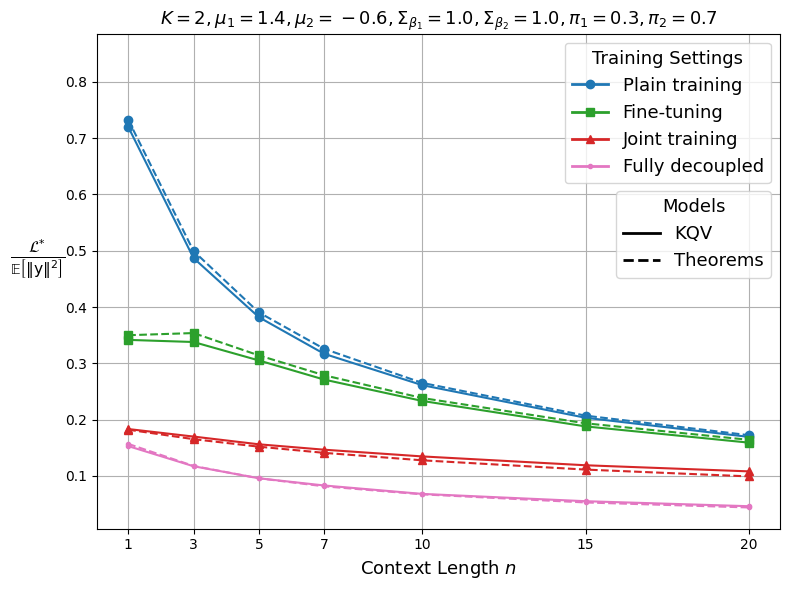

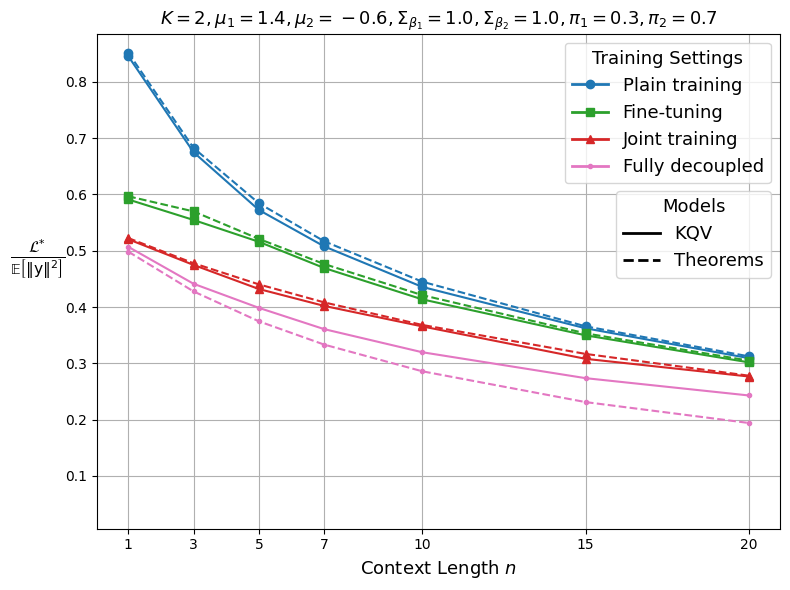

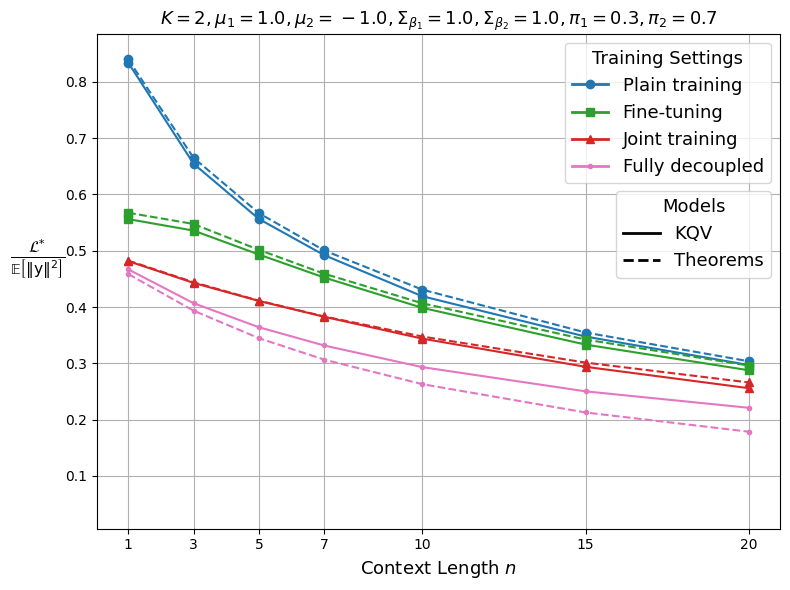

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

results = new_results
exp_names = list(results.keys())

tasks = [
    {'label': 'Plain training', 'data_key': 'results_joint', 'theorem_id': 'pretrain_losses', 'idx': 0},
    {'label': 'Fine-tuning', 'data_key': 'results_finetuning', 'theorem_id': 'finetune_losses', 'idx': 1},
    {'label': 'Joint training', 'data_key': 'results_joint', 'theorem_id': 'joint_losses', 'idx': 1},
    {'label': 'Fully decoupled', 'data_key': 'results_joint', 'theorem_id': 'heads_losses', 'idx': 2},
]

colors = {'Plain training': '#1f77b4', 'Fine-tuning': '#2ca02c', 'Joint training': '#d62728', 'Fully decoupled': '#e377c2'}
markers = {'Plain training': 'o', 'Fine-tuning': 's', 'Joint training': '^', 'Fully decoupled': '.'}
line_styles = {'KQV': '-', 'Theorems': '--'}

all_losses = []

for exp_name in exp_names:
    norm_factor = theory[exp_name]['normalization']
    for task in tasks:
        data_key = task['data_key']
        idx = task['idx']
        label = task['label']
        thrm_key = task['theorem_id']
        
        kqv_data = results[exp_name][data_key][0, :, idx] / norm_factor
        all_losses.extend(kqv_data)


# Compute global y-limits
ymin = min(all_losses)
ymax = max(all_losses)
y_range = ymax - ymin
ymin -= 0.05 * y_range
ymax += 0.05 * y_range

# Now plot for each experiment
for exp_name in exp_names:
    plt.figure(figsize=(8, 6))
    norm_factor = theory[exp_name]['normalization']

    for task in tasks:
        data_key = task['data_key']
        idx = task['idx']
        label = task['label']
        thrm_key = task['theorem_id']
        color = colors[label]
        marker = markers[label]

        # Plot KQV results (solid lines)
        plt.plot(
            icl_sample_counts,
            results[exp_name][data_key][0, :, idx] / norm_factor,
            label=label,
            color=color,
            linestyle='-',
            marker=marker,
        )

        plt.plot(
            icl_sample_counts,
            theory[exp_name][thrm_key] / norm_factor,
            color=color,
            linestyle='--',
            marker=marker,
        )


    plt.xlabel(r'Context Length $n$', fontsize=13)
    plt.ylabel(r'$\frac{\mathcal{L}^{*}}{\rm \mathbb{E} \left[ \Vert y \Vert^2 \right]}$', fontsize=16, rotation=0, labelpad=20)

    # LaTeX-style dynamic title with variables
    plt.title(rf"$K=2, \mu_1={experiments_details[exp_name]['means'][0]}, \mu_2={experiments_details[exp_name]['means'][1]}, \Sigma_{{\beta_1}}={experiments_details[exp_name]['cov_matrices'][0]}, \Sigma_{{\beta_2}}={experiments_details[exp_name]['cov_matrices'][1]}, \pi_1={experiments_details[exp_name]['mixture_weights'][0]}, \pi_2={experiments_details[exp_name]['mixture_weights'][1]}$", fontsize=13)

    plt.grid(True)

    # Create custom legends
    # Legend for tasks
    legend_tasks = [
        Line2D([0], [0], color=color, lw=2, linestyle='-', marker=markers[label], label=label)
        for label, color in colors.items()
    ]
    # Legend for methods
    legend_methods = [
        Line2D([0], [0], color='black', lw=2, linestyle=style, label=method)
        for method, style in line_styles.items()
    ]

    # Place Training Settings legend in the upper right with bbox_to_anchor
    first_legend = plt.legend(handles=legend_tasks, title='Training Settings', 
                              bbox_to_anchor=(1, 1), loc='upper right', fontsize=13, title_fontsize=13)
    plt.gca().add_artist(first_legend)
    
    # Place Methods legend just below the first legend
    plt.legend(handles=legend_methods, title='Models', 
               bbox_to_anchor=(1, 0.70), loc='upper right', fontsize=13, title_fontsize=13)

    plt.ylim([ymin, ymax])
    plt.tight_layout()

    plt.xticks(icl_sample_counts)

    plt.savefig(f'figure_{exp_name}.pdf', format='pdf', bbox_inches='tight', pad_inches=0.5)
    plt.savefig('figure.svg', format='svg', bbox_inches='tight', pad_inches=0.5)

    plt.show()

# Ablations

In [22]:
ablation_dict = {
    "Ablation by Mean": {
        "cov_11": [
            "zero_cov_11",
            "zero_cov_11_different_means",
            "nonzero_cov_11",
            "nonzero_cov_11_different_means"
        ],
        "cov_12": [
            "zero_cov_12",
            "nonzero_cov_12"
        ],
        "cov_22": [
            "zero_cov_22",
            "nonzero_cov_22"
        ]
    },
    "Ablation by Covariance": {
        "zero": [
            "zero_cov_12",
            "zero_cov_11",
            "zero_cov_22"
        ],
        "nonzero": [
            "nonzero_cov_22",
            "nonzero_cov_11",
            "nonzero_cov_12"
        ]
    },
    "Ablation by Mean Distributions": {
        "zero": [
            "zero_cov_11",
            "zero_cov_11_different_means",
        ],
        "nonzero": [
            "nonzero_cov_11",
            "nonzero_cov_11_different_means",
        ]
    }
}

In [ ]:
L_PT_KQV= np.array([0.75267055, 0.23076923, 0.13043478, 0.09090909, 0.05660377])
L_FT_KQV= np.array([0.75423552, 0.23523653, 0.13052578, 0.09194851, 0.05596847])
L_JT_KQV= np.array([0.76345232, 0.23478523, 0.13457878, 0.09232561, 0.05476875])
L_PT_WPGD= np.array([0.76345232, 0.23678323, 0.13457878, 0.09232561, 0.05476875])
L_FT_WPGD= np.array([0.76876952, 0.23576823, 0.13485978, 0.09645761, 0.05253675])
L_JT_WPGD= np.array([0.78597967, 0.23756358, 0.14728563, 0.09573657, 0.05538294])

colors = {'Plain training': 'blue', 'Fine-tuning': 'green', 'Joint training': 'red'}
markers = {'Plain training': 'o', 'Fine-tuning': 's', 'Joint training': '^'}

line_styles = {'KQV': '-', 'Reduced Model': '--'}

all_losses = np.concatenate([L_FT_KQV, L_JT_KQV, L_PT_KQV, L_FT_WPGD, L_JT_WPGD, L_PT_WPGD])

ymin = min(all_losses)
ymax = max(all_losses)
y_range = ymax - ymin
ymin -= 0.05 * y_range
ymax += 0.05 * y_range

icl_sample_counts = [1, 10, 20, 30, 50]

plt.figure(figsize=(8, 6))

plt.plot(
    icl_sample_counts,
    L_PT_KQV,
    label='Plain training',
    color='blue',
    linestyle='-',
    marker='o',
)

plt.plot(
    icl_sample_counts,
    L_PT_WPGD,
    label='Plain training',
    color='blue',
    linestyle='--',
    marker='o',
)

plt.plot(
    icl_sample_counts,
    L_FT_KQV,
    label='Fine-tuning',
    color='green',
    linestyle='-',
    marker='s',
)

plt.plot(
    icl_sample_counts,
    L_FT_WPGD,
    label='Fine-tuning',
    color='green',
    linestyle='--',
    marker='s',
)

plt.plot(
    icl_sample_counts,
    L_JT_KQV,
    label='Joint training',
    color='red',
    linestyle='-',
    marker='^',
)

plt.plot(
    icl_sample_counts,
    L_JT_WPGD,
    label='Joint training',
    color='red',
    linestyle='--',
    marker='^',
)


plt.xlabel(r'Context Length $n$', fontsize=13)
plt.ylabel(r'$\frac{\mathcal{L}^{*}}{\rm \mathbb{E} \left[ \Vert y \Vert^2 \right]}$', fontsize=16, rotation=0, labelpad=20)

# LaTeX-style dynamic title with variables
plt.title(rf"$K=2, \mu_1=0.0, \mu_2=0.0, \Sigma_{{\beta_1}}=1.0, \Sigma_{{\beta_2}}=2.0, \pi_1=0.5, \pi_2=0.5$", fontsize=13)

plt.grid(True)

# Create custom legends
# Legend for tasks
legend_tasks = [
    Line2D([0], [0], color=color, lw=2, linestyle='-', marker=markers[label], label=label)
    for label, color in colors.items()
]
# Legend for methods
legend_methods = [
    Line2D([0], [0], color='black', lw=2, linestyle=style, label=method)
    for method, style in line_styles.items()
]

# Place Training Settings legend in the upper right with bbox_to_anchor
first_legend = plt.legend(handles=legend_tasks, title='Training Settings', 
                            bbox_to_anchor=(1, 1), loc='upper right', fontsize=13, title_fontsize=13)
plt.gca().add_artist(first_legend)

# Place Methods legend just below the first legend
plt.legend(handles=legend_methods, title='Models', 
            bbox_to_anchor=(1, 0.75), loc='upper right', fontsize=13, title_fontsize=13)

plt.ylim([ymin, ymax])
plt.tight_layout()

plt.savefig('figure.pdf', format='pdf', bbox_inches='tight', pad_inches=0.5)
plt.savefig('figure.svg', format='svg', bbox_inches='tight', pad_inches=0.5)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Assuming icl_sample_counts, wpgd_results, results, theory are defined

# Prepare a list of experiments to plot
exp_names = list(results.keys())

# Define the tasks with their corresponding data keys and indices
tasks = [
    {'label': 'Plain training', 'data_key': 'results_joint', 'theorem_id': 'pretrain_losses', 'idx': 0},
    {'label': 'Fine-tuning', 'data_key': 'results_finetuning', 'theorem_id': 'finetune_losses', 'idx': 1},
    {'label': 'Joint training', 'data_key': 'results_joint', 'theorem_id': 'joint_losses', 'idx': 1},
    # {'label': 'Fully decoupled', 'data_key': 'results_joint', 'theorem_id': 'heads_losses', 'idx': 3},
]

# Define colors and markers for the tasks
colors = {'Plain training': '#1f77b4', 'Fine-tuning': '#2ca02c', 'Joint training': '#d62728'} #, 'Fully decoupled': '#e377c2'}
markers = {'Plain training': 'o', 'Fine-tuning': 's', 'Joint training': '^', 'Fully decoupled': '.'}

# Line styles for methods
line_styles = {'KQV': '-', 'Theorems': '--'}

# Find the global y-limits across all experiments to make y-limits consistent
all_losses = []


icl_sample_counts = [1, 10, 20, 30, 40, 50]

for exp_name in exp_names:
    norm_factor = theory[exp_name]['normalization']
    for task in tasks:
        data_key = task['data_key']
        idx = task['idx']
        label = task['label']
        thrm_key = task['theorem_id']
        
        # Handle Plain training separately if needed
        if label == 'Plain training':
            # Assuming Plain training exists only in 'results_joint' and index 0
            # WPGD results may not have Plain training; adjust accordingly
            try:
                wpgd_data = theory[exp_name][thrm_key] / norm_factor
                all_losses.extend(wpgd_data)
            except KeyError:
                pass  # Skip if WPGD doesn't have Plain training

            kqv_data = results[exp_name][data_key][0, :, idx] / norm_factor
            all_losses.extend(kqv_data)
        else:
            # WPGD results
            wpgd_data = theory[exp_name][thrm_key] / norm_factor
            all_losses.extend(wpgd_data)
            # KQV results
            kqv_data = results[exp_name][data_key][0, :, idx] / norm_factor
            all_losses.extend(kqv_data)

# Compute global y-limits
ymin = min(all_losses)
ymax = max(all_losses)
y_range = ymax - ymin
ymin -= 0.05 * y_range
ymax += 0.05 * y_range

# Now plot for each experiment
for exp_name in exp_names[2:3]:
    plt.figure(figsize=(8, 6))
    norm_factor = theory[exp_name]['normalization']

    for task in tasks:
        data_key = task['data_key']
        idx = task['idx']
        label = task['label']
        thrm_key = task['theorem_id']
        color = colors[label]
        marker = markers[label]

        # Plot KQV results (solid lines)
        plt.plot(
            icl_sample_counts,
            results[exp_name][data_key][0, :, idx] / norm_factor,
            label=label,
            color=color,
            linestyle='-',
            marker=marker,
        )

        plt.plot(
            icl_sample_counts,
            theory[exp_name][thrm_key] / norm_factor,
            color=color,
            linestyle='--',
            marker=marker,
        )


    plt.xlabel(r'Context Length $n$', fontsize=13)
    plt.ylabel(r'$\frac{\mathcal{L}^{*}}{\rm \mathbb{E} \left[ \Vert y \Vert^2 \right]}$', fontsize=16, rotation=0, labelpad=20)

    # LaTeX-style dynamic title with variables
    plt.title(rf"$K=2, \mu_1={experiments_details[exp_name]['means'][0]}, \mu_2={experiments_details[exp_name]['means'][1]}, \Sigma_{{\beta_1}}={experiments_details[exp_name]['cov_matrices'][0]}, \Sigma_{{\beta_2}}={experiments_details[exp_name]['cov_matrices'][1]}, \pi_1={experiments_details[exp_name]['mixture_weights'][0]}, \pi_2={experiments_details[exp_name]['mixture_weights'][1]}$", fontsize=13)

    plt.grid(True)

    # Create custom legends
    # Legend for tasks
    legend_tasks = [
        Line2D([0], [0], color=color, lw=2, linestyle='-', marker=markers[label], label=label)
        for label, color in colors.items()
    ]
    # Legend for methods
    legend_methods = [
        Line2D([0], [0], color='black', lw=2, linestyle=style, label=method)
        for method, style in line_styles.items()
    ]

    # Place Training Settings legend in the upper right with bbox_to_anchor
    first_legend = plt.legend(handles=legend_tasks, title='Training Settings', 
                              bbox_to_anchor=(1, 1), loc='upper right', fontsize=13, title_fontsize=13)
    plt.gca().add_artist(first_legend)
    
    # Place Methods legend just below the first legend
    plt.legend(handles=legend_methods, title='Models', 
               bbox_to_anchor=(1, 0.70), loc='upper right', fontsize=13, title_fontsize=13)

    plt.ylim([ymin, ymax])
    plt.tight_layout()


    plt.savefig('figure.pdf', format='pdf', bbox_inches='tight', pad_inches=0.5)
    plt.savefig('figure.svg', format='svg', bbox_inches='tight', pad_inches=0.5)

    plt.show()

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Assuming results, theory, experiments_details, icl_sample_counts are already defined

# Prepare a list of experiments to plot
exp_names = list(results.keys())
exp_name = exp_names[0]  # Use the first experiment for plotting

# Define the tasks with their corresponding data keys and indices
tasks = [
    {'label': 'Plain training', 'data_key': 'results_joint', 'theorem_id': 'pretrain_losses', 'idx': 0},
    {'label': 'Fine-tuning', 'data_key': 'results_finetuning', 'theorem_id': 'finetune_losses', 'idx': 1},
    {'label': 'Joint training', 'data_key': 'results_joint', 'theorem_id': 'joint_losses', 'idx': 1},
    {'label': 'Fully decoupled', 'data_key': 'results_joint', 'theorem_id': 'heads_losses', 'idx': 3},
]

# Define colors and markers for the tasks
colors = {'Plain training': '#1f77b4', 'Fine-tuning': '#2ca02c', 'Joint training': '#d62728', 'Fully decoupled': '#e377c2'}
markers = {'Plain training': 'o', 'Fine-tuning': 's', 'Joint training': '^', 'Fully decoupled': 'D'}

# Compute global y-limits
norm_factor = theory[exp_name]['normalization']
all_losses = []

for task in tasks:
    data_key = task['data_key']
    idx = task['idx']
    thrm_key = task['theorem_id']
    # KQV results
    kqv_data = results[exp_name][data_key][0, :, idx] / norm_factor
    all_losses.extend(kqv_data)
    # Theory results
    wpgd_data = theory[exp_name][thrm_key] / norm_factor
    all_losses.extend(wpgd_data)

# Compute global y-limits
ymin = min(all_losses)
ymax = max(all_losses)
y_range = ymax - ymin
ymin -= 0.05 * y_range
ymax += 0.05 * y_range

# Create figure
fig = plt.figure(figsize=(6, 6))

# Define the positions for the plots with same height and widths
plot_width = 0.40
plot_height = 0.30

# Define the positions for the plots
top_center_ax = fig.add_axes([0.32, 0.69, plot_width, plot_height])
middle_left_ax = fig.add_axes([0.09, 0.35, plot_width, plot_height])
middle_right_ax = fig.add_axes([0.55, 0.35, plot_width, plot_height])
bottom_center_ax = fig.add_axes([0.32, 0.01, plot_width, plot_height])

# Define the subplots and their configurations
subplot_configs = [
    {
        'ax': top_center_ax,
        'included_tasks': ['Plain training', 'Fully decoupled'],
        'highlighted_task': 'Plain training',
        'title': 'Plain training',
    },
    {
        'ax': middle_left_ax,
        'included_tasks': ['Plain training', 'Fine-tuning', 'Fully decoupled'],
        'highlighted_task': 'Fine-tuning',
        'title': 'Fine-tuning with prompts',
    },
    {
        'ax': middle_right_ax,
        'included_tasks': ['Plain training', 'Joint training', 'Fully decoupled'],
        'highlighted_task': 'Joint training',
        'title': 'Joint training with prompts',
    },
    {
        'ax': bottom_center_ax,
        'included_tasks': ['Plain training', 'Fully decoupled'],
        'highlighted_task': 'Fully decoupled',
        'title': 'Joint training with even more parameters',
    },
]

# Now plot for each subplot
for config in subplot_configs:
    ax = config['ax']
    included_tasks = config['included_tasks']
    highlighted_task = config['highlighted_task']
    title = config['title']
    
    for task in tasks:
        label = task['label']
        if label in included_tasks:
            data_key = task['data_key']
            idx = task['idx']
            thrm_key = task['theorem_id']
            color = colors[label]
            marker = markers[label]
            # Determine alpha (transparency)
            if label == highlighted_task:
                alpha = 1.0
                linewidth = 2.5
            else:
                alpha = 0.3  # Faded curves to gray
                color = 'gray'
                linewidth = 1.5
            # Plot KQV results (solid lines)
            ax.plot(
                icl_sample_counts,
                results[exp_name][data_key][0, :, idx] / norm_factor,
                color=color,
                linestyle='-',
                marker=marker,
                markersize=5,
                alpha=alpha,
                linewidth=linewidth,
            )
            # Plot Theory results (dashed lines)
            ax.plot(
                icl_sample_counts,
                theory[exp_name][thrm_key] / norm_factor,
                color=color,
                linestyle='--',
                marker=marker,
                markersize=5,
                alpha=alpha,
                linewidth=linewidth,
            )
    
    ax.set_ylim([ymin, ymax])
    ax.set_xticks(icl_sample_counts)
    ax.set_xticklabels([str(x) for x in icl_sample_counts])
    ax.grid(visible=True, which='major', linestyle='-', linewidth=0.7)
    ax.set_title(title, fontsize=12)
    # Adjust tick parameters
    ax.tick_params(axis='both', which='both', labelsize=10)
    # Remove x-tick labels for all but the bottom_center plot
    if ax != bottom_center_ax:
        ax.set_xticklabels([])
    # Remove y-tick labels for plots not on the left
    if ax not in [top_center_ax, middle_left_ax, bottom_center_ax]:
        ax.set_yticklabels([])

# Add x-axis label to bottom_center subplot
bottom_center_ax.set_xlabel(r'Context Length $n$', fontsize=13)
# Add y-axis label to the leftmost subplot (top_center_ax)
top_center_ax.set_ylabel(
    r'$\frac{\mathcal{L}^{*}}{\rm \mathbb{E} \left[ \Vert y \Vert^2 \right]}$',
    fontsize=16,
    rotation=0,
    labelpad=25,
)

# Add double-headed hollow arrow on the left
# Create an invisible axis for annotations
ax_invisible = fig.add_axes([0, 0, 1, 1], frameon=False)
ax_invisible.axis('off')

# Draw the double-headed hollow arrow
from matplotlib.patches import ConnectionPatch

# Draw a hollow double-headed arrow using ConnectionPatch
arrow = ConnectionPatch(
    (0.00, 0.12), (0.00, 0.88),  # Starting and ending points
    "figure fraction", "figure fraction",
    arrowstyle='<->', linewidth=1.5, color='black'
)
fig.add_artist(arrow)


# Add text labels to the arrow
fig.text(
    0.12, 0.90, 'Fully Coupled', ha='right', va='center', fontsize=18
)
fig.text(
    0.14, 0.10, 'Fully Decoupled', ha='right', va='center', fontsize=18
)

# Add an overall legend
legend_elements = [
    Line2D([0], [0], color='black', linestyle='-', label='1-Layer Linear Attention Model'),
    Line2D([0], [0], color='black', linestyle='--', label='Our Theory')
]
fig.legend(handles=legend_elements, loc='lower left', fontsize=12, frameon=True, ncol=1)

plt.savefig('figure.pdf', format='pdf', bbox_inches='tight', pad_inches=0.5)
plt.savefig('figure.svg', format='svg', bbox_inches='tight', pad_inches=0.5)

plt.show()

NameError: name 'results' is not defined

In [ ]:
plt.savefig('figure.pdf', format='pdf')
plt.savefig('figure.svg', format='svg')

In [36]:
results

{'zero_cov_12': {'results_finetuning': array([[[22.16125317, 17.04369144, 21.96967087, 16.13394289],
          [11.89735689, 11.35209532, 11.89249477, 10.17968111],
          [ 8.25354605,  8.02056427,  8.18853445,  7.32415857],
          [ 6.32519879,  6.22333026,  6.25667806,  5.50464044],
          [ 5.13325834,  5.07386894,  5.05429301,  4.43192663],
          [ 4.31827068,  4.27724276,  4.26457825,  3.82704904]]]),
  'results_joint': array([[[22.16125317, 15.95002527, 21.87663097, 15.55979824],
          [11.89735689, 10.47110405, 11.95096321,  8.98301678],
          [ 8.25354605,  7.62428598,  8.07974014,  6.17915902],
          [ 6.32519879,  5.96152868,  6.16484532,  4.95671802],
          [ 5.13325834,  4.92978911,  4.9868299 ,  4.11343675],
          [ 4.31827068,  4.17940159,  4.18085465,  3.63475058]]])},
 'nonzero_cov_22': {'results_finetuning': array([[[26.09683266, 20.07012806, 26.00781422, 19.21108227],
          [13.9475523 , 13.25097876, 14.01191387, 11.78481922],
   

In [26]:
multilayer_results

{'single_task_mu_ratio_0.1_layers_1': {'results_finetuning': array([[[1000000., 1000000., 1000000.],
          [1000000., 1000000., 1000000.],
          [1000000., 1000000., 1000000.],
          [1000000., 1000000., 1000000.],
          [1000000., 1000000., 1000000.],
          [1000000., 1000000., 1000000.],
          [1000000., 1000000., 1000000.]]]),
  'results_joint': array([[[1000000., 1000000., 1000000.],
          [1000000., 1000000., 1000000.],
          [1000000., 1000000., 1000000.],
          [1000000., 1000000., 1000000.],
          [1000000., 1000000., 1000000.],
          [1000000., 1000000., 1000000.],
          [1000000., 1000000., 1000000.]]])},
 'single_task_mu_ratio_0.1_layers_2': {'results_finetuning': array([[[1000000., 1000000., 1000000.],
          [1000000., 1000000., 1000000.],
          [1000000., 1000000., 1000000.],
          [1000000., 1000000., 1000000.],
          [1000000., 1000000., 1000000.],
          [1000000., 1000000., 1000000.],
          [1000000

In [35]:
wpgd_results

{'zero_cov_12': {'results_finetuning': array([[[22.03116837, 16.95275173],
          [11.95105982, 11.28350096],
          [ 8.23598061,  8.07275305],
          [ 6.34289656,  6.26719322],
          [ 5.15557828,  5.10555663],
          [ 4.36937952,  4.32058887]]]),
  'results_joint': array([[[22.03116837, 15.85152502],
          [11.95105982, 10.51005726],
          [ 8.23598061,  7.627984  ],
          [ 6.34289656,  6.02042093],
          [ 5.15557828,  4.97558012],
          [ 4.36937952,  4.24452686]]])},
 'nonzero_cov_22': {'results_finetuning': array([[[26.05685101, 19.99994297],
          [14.07638273, 13.41139841],
          [ 9.71887598,  9.48265333],
          [ 7.46751151,  7.30485001],
          [ 6.08298426,  6.01506057],
          [ 5.15160217,  5.08391008]]]),
  'results_joint': array([[[26.05685101, 18.61316586],
          [14.07638273, 12.38433876],
          [ 9.71887598,  9.00150909],
          [ 7.46751151,  7.08331122],
          [ 6.08298426,  5.85796537],
     

In [39]:
results

{'isotropic_covariance_zero_mean': {'results_finetuning': array([[[7.49075723, 3.55186198, 2.02745277],
          [5.06429901, 3.51247609, 1.97062386],
          [3.97137671, 3.17198162, 1.89066466],
          [3.29371595, 2.81780434, 1.77034365],
          [2.71516128, 2.42367573, 1.63089315],
          [2.11241665, 1.95287112, 1.45485992],
          [1.75866129, 1.6526523 , 1.29284662]]]),
  'results_joint': array([[[7.49075723, 1.9044125 , 1.58918741],
          [5.06429901, 1.76498839, 1.21667105],
          [3.97137671, 1.62200385, 0.99388703],
          [3.29371595, 1.52213112, 0.86103146],
          [2.71516128, 1.39806323, 0.70536517],
          [2.11241665, 1.23458599, 0.57042777],
          [1.75866129, 1.12170347, 0.47781378]]])},
 'noisy_zero_cov_11': {'results_finetuning': array([[[15.56785355, 10.8782795 ,  9.76600723],
          [12.42390203, 10.2070261 ,  9.11743317],
          [10.53411226,  9.4932663 ,  8.45123186],
          [ 9.34269743,  8.63580742,  7.80975637],
 